## Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, make_scorer
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
import os
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils import parallel_backend

clone = sklearn.clone
sklearn.set_config(transform_output='pandas')

pd.set_option('display.max_colwidth', None)


## Import data

In [2]:
raw_df = pd.read_csv('../data/mushrooms/train.csv', index_col='Id')
raw_df

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,poisonous
Id,,,,,,,
6573,k,e,False,w,w,v,1
4426,f,e,True,p,w,y,0
7018,b,w,False,w,w,s,0
5789,k,g,False,w,w,n,0
6187,f,n,True,p,g,v,0
...,...,...,...,...,...,...,...
7002,f,g,False,b,b,v,1
7323,k,e,False,p,p,v,1
6206,f,g,False,n,b,y,1


Split off labels:

In [3]:
X = raw_df.copy()
y = X.pop('poisonous')

Split into training vs. test set:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(5199, 1300, 5199, 1300)

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5199 entries, 220 to 6232
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   cap.shape               5199 non-null   object
 1   cap.color               5199 non-null   object
 2   bruises                 5199 non-null   bool  
 3   stalk.color.above.ring  5199 non-null   object
 4   stalk.color.below.ring  5199 non-null   object
 5   population              5199 non-null   object
dtypes: bool(1), object(5)
memory usage: 248.8+ KB


## Handle data types (only nominal this time)

In [6]:
nom_columns = X.columns # all columns are nominal
nom_columns

Index(['cap.shape', 'cap.color', 'bruises', 'stalk.color.above.ring',
       'stalk.color.below.ring', 'population'],
      dtype='object')

### Nominal encoder

In [7]:
nom_pipe = make_pipeline(
  SimpleImputer(strategy='constant', fill_value='unknown'),
  OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist'),
)
nom_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='unknown', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                               sparse_output=False))])

### Full preprocessor

In [8]:
preprocessor = nom_pipe
preprocessor

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='unknown', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                               sparse_output=False))])

In [9]:
preprocessor.fit_transform(X_train)

,cap.shape_b,cap.shape_c,cap.shape_f,cap.shape_k,cap.shape_s,cap.shape_x,cap.color_b,cap.color_c,cap.color_e,cap.color_g,...,stalk.color.below.ring_o,stalk.color.below.ring_p,stalk.color.below.ring_w,stalk.color.below.ring_y,population_a,population_c,population_n,population_s,population_v,population_y
Id,,,,,,,,,,,,,,,,,,,,,
220,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1368,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4841,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
459,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7518,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7843,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
694,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Plots

In [10]:
# sns.pairplot(data=preprocessor.fit_transform(X).join(y), kind='reg', x_vars=['poisonous'], plot_kws = dict(scatter_kws={'alpha': 0.1}));

## Challenge data

In [11]:
challenge_df = pd.read_csv('../data/mushrooms/test.csv', index_col='Id')[X.columns] # fix column order
challenge_df

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population
Id,,,,,,
5165,f,w,True,w,w,v
4281,f,g,False,n,p,v
231,x,n,True,w,p,v
3890,f,n,False,w,w,s
1521,x,y,False,n,p,v
...,...,...,...,...,...,...
983,x,n,False,w,y,v
7055,x,e,True,p,g,v
7456,x,y,False,b,n,y


In [12]:
preprocessor.transform(challenge_df)

,cap.shape_b,cap.shape_c,cap.shape_f,cap.shape_k,cap.shape_s,cap.shape_x,cap.color_b,cap.color_c,cap.color_e,cap.color_g,...,stalk.color.below.ring_o,stalk.color.below.ring_p,stalk.color.below.ring_w,stalk.color.below.ring_y,population_a,population_c,population_n,population_s,population_v,population_y
Id,,,,,,,,,,,,,,,,,,,,,
5165,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4281,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
231,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3890,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1521,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7055,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7456,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Result scores

In [13]:
result_scores = pd.DataFrame(columns=['confusion', 'fn', 'precision', 'params', 'model'])

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score

def false_negative_score(y_true, y_pred):
  cfm = confusion_matrix(y_true, y_pred)
  return cfm[1, 0] / max(cfm[0, 0], 0.0001)

def ratings(y_true, y_pred):
  if isinstance(y_pred, np.ndarray):
    y_pred = pd.Series(y_pred)

  return pd.Series({
    'confusion': confusion_matrix(y_true, y_pred),
    'fn': false_negative_score(y_true, y_pred),
    'precision': precision_score(y_true, y_pred)
  })

def display_ratings(ratings):
  fig, ax = plt.subplots(figsize=(2, 2))
  for key, value in ratings.items():
    if key == 'confusion':
      continue
    print(f'{key}: {value}')

  ConfusionMatrixDisplay(
    ratings['confusion'],
    display_labels=['edible', 'poisonous']
  ).plot(ax=ax)

## Baseline: All poisonous

In [15]:
from sklearn.base import BaseEstimator, RegressorMixin

class BaselineModel(RegressorMixin, BaseEstimator):
    def __init__(self):# , *, param=1):
        #self.param = param
        pass
    def fit(self, X, y):
        self.is_fitted_ = True
        return self
    def predict(self, X):
        return X.assign(y = True).y


fn: 0.0
precision: 0.49153846153846154


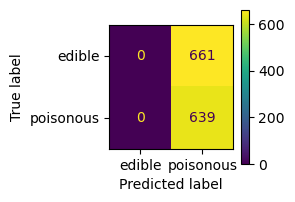

In [16]:
display_ratings(ratings(y_test, make_pipeline(preprocessor, BaselineModel()).fit(X_train).predict(X_test)))

## Rescaling prices to sq.f.

## PCA

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

pca = make_pipeline(
  StandardScaler(),
  PCA(n_components=0.95),
  #MinMaxScaler((-1,1), clip=True)
)

pca_pipe = ColumnTransformer(
  transformers=[
    ('pca', pca, lambda X: X.columns)
  ],
  verbose_feature_names_out=False
)


In [18]:
print('feature space: ', preprocessor.fit_transform(X_train).shape)
print('pca space: ', make_pipeline(preprocessor, pca_pipe).fit_transform(X_train).shape)

feature space:  (5199, 42)
pca space:  (5199, 29)


## Approach: Grid search on decision tree model

In [19]:
pipe = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('pca', None),
  ('model', BaselineModel())
])

param_grids = dict(
  # baseline = {},
  gbc = dict(
    model = [ GradientBoostingClassifier() ],
    model__learning_rate = [0.01],
    model__n_estimators = [200],
    model__min_samples_split = [2],
    model__min_samples_leaf = [1],
    model__max_depth = [10]
  ),
  # knn = {
  #   'pca': [ pca_pipe ],
  #   'pca__pca__pca__n_components': [0.995],
  #   'model': [ KNeighborsClassifier() ],
  #   'model__n_neighbors': [25,35,45],
  #   'model__weights': ['uniform', 'distance'],
  #   'model__p': [1, 2, 10, 15]
  # }
  # pca_gbc = dict(
  #   pca = [ pca_pipe ],
  #   model = [ GradientBoostingClassifier() ],
  #   model__learning_rate = [0.01],
  #   model__n_estimators = [ 400, 500 ],
  #   model__min_samples_split = [2],
  #   model__min_samples_leaf = [1],
  #   model__max_depth = [10, 15, 20]
  # ),
  # gbc = {
  #   'model': [ GradientBoostingClassifier() ],
  #   'model__learning_rate': [0.01],
  #   'model__max_depth': [10],
  #   'model__min_samples_leaf': [1],
  #   'model__min_samples_split': [2],
  #   'model__n_estimators': [200]
  # },
)

for name, grid in param_grids.items():
  search = GridSearchCV(
    pipe,
    grid,
    cv=5,
    refit=True,
    scoring=make_scorer(false_negative_score, greater_is_better=False),
    #scoring='f1',
    #scoring = make_scorer(fbeta_score, beta=5),
    verbose=10,
    n_jobs=-1,
  )

  search.fit(X=X_train, y=y_train)

  result_scores.loc[name] = {
    **ratings(y_test, search.predict(X_test)),
    'params': search.best_params_,
    'model': search.best_estimator_
  }

result_scores.drop(columns=['model'])

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[CV 2/5; 1/1] START model=GradientBoostingClassifier(), model__learning_rate=0.01, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200
[CV 3/5; 1/1] START model=GradientBoostingClassifier(), model__learning_rate=0.01, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200
[CV 5/5; 1/1] START model=GradientBoostingClassifier(), model__learning_rate=0.01, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200
[CV 1/5; 1/1] START model=GradientBoostingClassifier(), model__learning_rate=0.01, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200
[CV 4/5; 1/1] START model=GradientBoostingClassifier(), model__learning_rate=0.01, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200
[CV 1/5; 1/1] END model=GradientBoostingClassifier(), model__learning_rate=0.01, mode

,confusion,fn,precision,params
gbc,"[[641, 20], [26, 613]]",0.040562,0.968404,"{'model': GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=200), 'model__learning_rate': 0.01, 'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}"


In [20]:
result_scores.loc['gbc', 'params']

{'model': GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=200),
 'model__learning_rate': 0.01,
 'model__max_depth': 10,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 200}

## Analyze candidate and tune threshold

In [21]:
candidate = result_scores.loc['gbc', 'model']

/home/til/local/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/til/local/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


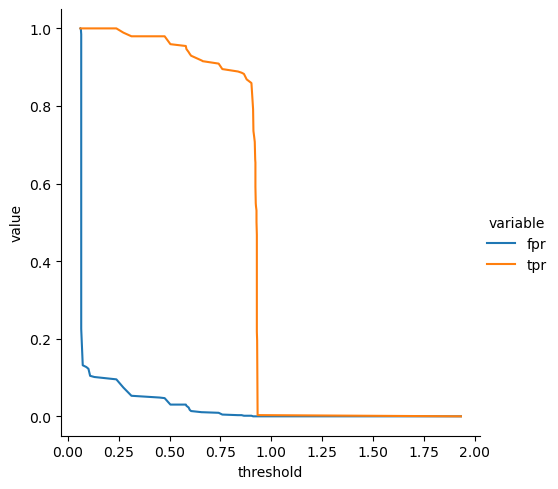

In [22]:
from sklearn.metrics import roc_curve

sns.relplot(
  data =(
    pd.DataFrame(roc_curve(y_test, candidate.predict_proba(X_test)[:, 1]), index=['fpr', 'tpr', 'threshold'])
    .T
    .set_index('threshold')
    .pipe(lambda x: x[['fpr', 'tpr']].melt(ignore_index=False))
  ),
  x = 'threshold',
  y = 'value',
  hue='variable',
  kind='line'
);

This curve shows how the true-positive-rate drops (i.e. false-negatives appear: people eat poisonous mushrooms) as the threshold increases above ≈25%.

It also shows how the false-positive-rate drops (i.e. true-negatives increase: less edible mushrooms are wasted) as the threshold increases.

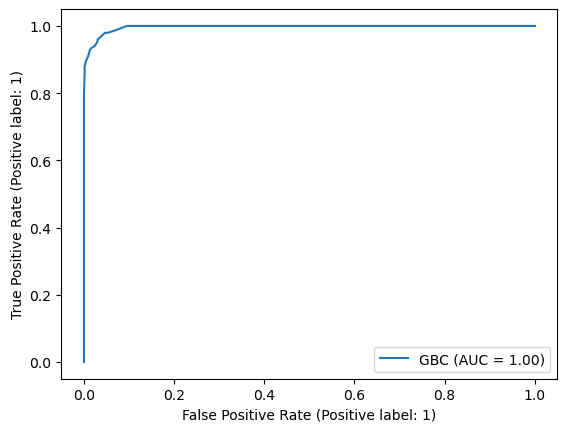

In [23]:
from turtle import pos
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(candidate, X_test, y_test, name='GBC');

This receiver-operating-characteristic (ROC) curve shows a very good classification performance (area under curve ≈ 1.00): We can reach very low false-negative-rates (no poisonous mushrooms are missed) while still identifying most edible mushrooms as such.

## An auto-thresholding classifier for low false-negative rates

Using the ROC-curve analysis automatically, allows to wrap any classifier that provides probabilities via `predict_proba()` and to calibrate a suitable threshold (w.r.t. the training data-set).

In [24]:
import sys
sys.path.append('../src')

from fnlc import FalseNegativeLimitedClassifier

### Performance of the base classifier

fn: 0.0405616224648986
precision: 0.9684044233807267


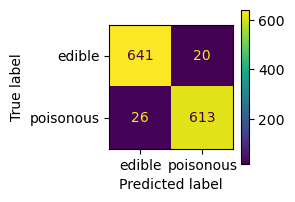

In [25]:
display_ratings(ratings(y_test, candidate.fit(X_train, y_train).predict(X_test)))

### Performance of the calibrated classifier

fn: 0.0
precision: 0.9102564102564102


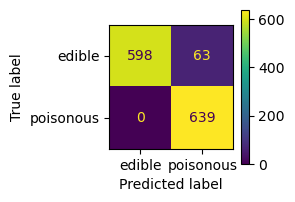

In [26]:
display_ratings(ratings(y_test, FalseNegativeLimitedClassifier(candidate).fit(X_train, y_train).predict(X_test)))

### Prepare the final classifier

This uses the complete known data-set for training. 

0.23723066211911287
fn: 0.0
precision: 0.9102564102564102


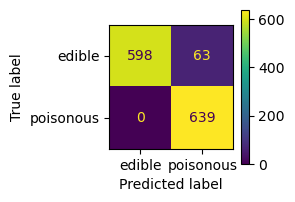

In [27]:
challenge_model = FalseNegativeLimitedClassifier(result_scores.loc['gbc', 'model']).fit(X, y)
print(challenge_model.threshold_)
display_ratings(ratings(y_test, challenge_model.predict(X_test)))

In [28]:
(
  X
  .apply(lambda x: x.sample(len(x)))
  .assign(proba=lambda x: challenge_model.estimator.predict_proba(x)[:,1])
  [lambda x: (x.proba < 0.2)]
)


,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,proba
Id,,,,,,,
4,k,n,False,o,o,c,0.065545
7,x,g,True,p,p,y,0.065545
11,f,g,False,w,w,s,0.065545
13,f,g,True,p,p,v,0.065545
14,x,e,True,g,p,v,0.065545
...,...,...,...,...,...,...,...
8108,x,b,True,e,e,c,0.065545
8110,x,w,True,w,w,n,0.069387
8112,x,y,True,w,w,s,0.065545


## Produce the competition submission

In [29]:
(
  challenge_df
  .assign(
    poisonous=
    (
      challenge_model.predict(challenge_df)
    )
  )
  [['poisonous']]
  .pipe(lambda x: [x.to_csv('../data/mushrooms/submission.csv'), x][-1])
)

,poisonous
Id,
5165,1
4281,1
231,0
3890,0
1521,1
...,...
983,1
7055,0
7456,1


# Result

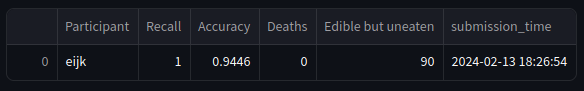

Looks good :-)

## Store the model for use in a streamlit app

In [30]:
with open('../data/mushrooms/classifier.pickle', 'wb') as file:
  import pickle
  pickle.dump(challenge_model, file)